# Title
### Time Series Forecasting

# Business Understanding
### Introduction


This project focuses on time series forecasting to predict store sales for Corporation Favorita, a large Ecuadorian-based grocery retailer. The objective is to build a model that accurately predicts the unit sales for thousands of items sold at different Favorita stores

## Hypothesis
 
 Null Hypothesis: The type of holiday does not have any significant on the increase of sales
 
 Alternative Hypothesis: The type of holiday has significant impact on the increase in sales
 
 ## Questions

The questions below are to be answered. Do note that, you are free to draw more hypothesis from the data.

1. Is the train dataset complete (has all the required dates)?

2. Which dates have the lowest and highest sales for each year?

3. Did the earthquake impact sales?

4. Are certain groups of stores selling more products? (Cluster, city, state, type)

5. Are sales affected by promotions, oil prices and holidays?

6. What analysis can we get from the date and its extractable features?

7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

Your task is to build a model that more accurately predicts the unit sales for thousands of items.

# Importing Liberaries

In [1]:
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot  as plt 
import seaborn as sns
import matplotlib.dates as mdates
import plotly.express as px

# impoerting and reading sql file
import pyodbc
from dotenv import dotenv_values



# Statistical Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy.stats import ttest_ind
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from statsmodels.tsa.seasonal import STL


# Feature processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor



# cancelling warning messages
import warnings
warnings.filterwarnings("ignore")



#### Loading the data set from SQL server

In [ ]:
# # create dotenv environment
# environment_variables = dotenv_values()

# # get varriable from .env created
# server = environment_variables.get("SERVER")
# database = environment_variables.get("DATABASE")
# username = environment_variables.get("USERNAME")
# password =environment_variables.get("PASSWORD")




In [3]:
# create  connections to the server using sever name, username, database and password
# conn_str = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server 


# connection = pyodbc.connect(conn_str)

In [5]:
# # read data from oil table
# query = "SELECT * From dbo.oil"
# oil_df = pd.read_sql(query,connection, parse_dates=["date"])

# # read data from holiday table 
# query2= "SELECT * from dbo.holidays_events"
# holiday_df=pd.read_sql(query2,connection, parse_dates=["date"])

# # read data from store table
# query3= "SELECT * from dbo.stores"
# stores_df=pd.read_sql(query3,connection)





In [2]:
# converting the sql data to csv
oil_df =pd.read_csv("oil_data.csv", parse_dates=["date"])
holiday_df = pd.read_csv("holiday_data.csv", parse_dates=["date"])
stores_df = pd.read_csv("stores_data.csv")

In [3]:
#  Display dbo oil
oil_df.head(5)

,Unnamed: 0,date,dcoilwtico
0,0,2013-01-01,NaN
1,1,2013-01-02,93.139999
2,2,2013-01-03,92.970001
3,3,2013-01-04,93.120003
4,4,2013-01-07,93.199997


In [37]:
#  Display the holiday events
holiday_df.head(5)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [36]:
#  Display stores
stores_df.head(5)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [3]:
# drop the unnamed column in the tables
stores_df.drop(columns="Unnamed: 0",axis=1, inplace=True)
holiday_df.drop(columns="Unnamed: 0",axis=1, inplace=True)
oil_df.drop(columns="Unnamed: 0", axis=1, inplace=True)

#  loading of csv data set

In [4]:
# reading the csv file and seting the date as date type
test_data = pd.read_csv("test.csv", parse_dates=["date"])
train_data = pd.read_csv("train.csv", parse_dates=["date"])
transactions = pd.read_csv("transactions.csv",parse_dates=["date"])
sample_data = pd.read_csv("sample_submission.csv")

In [5]:
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


# Data Exploration and Understanding

Exploring and understanding the sql data

In [5]:
# Display summary statistics for the holiday events
holiday_summary = holiday_df.describe(include=object).T

# Display summary statistics for the oil price
oil_summary = oil_df.describe()

# Display summary statistics for the stotres
stores_summary = stores_df.describe(include=object).T

# Display results
print("statistics summary for holiday event:" )
display(holiday_summary)
print("=" *50)

print("Statistics summary for oil price")
display(oil_summary)
print("=" *50)

print("statistics summary of stores")
display(stores_summary)


statistics summary for holiday event:


,count,unique,top,freq
type,350,6,Holiday,221
locale,350,3,National,174
locale_name,350,24,Ecuador,174
description,350,103,Carnaval,10


Statistics summary for oil price


,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190001
25%,46.405001
50%,53.189999
75%,95.660000
max,110.620003


statistics summary of stores


,count,unique,top,freq
city,54,22,Quito,18
state,54,16,Pichincha,19
type,54,5,D,18


In [12]:
# Display infomation for the holiday events

# Display info for the oil price
print("Display holiday info:" )
print("=" *50)
holiday_info =holiday_df.info()
display(holiday_info)

# Display info for the stotres
print("Display oil info:" )
print("=" *50)
oil_info =oil_df.info()
display(oil_info)

# Display info for the stotres
print("Display stores info:" )
print("=" *50)
stores_info = stores_df.info()
display(stores_info)


Display holiday info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   350 non-null    int64         
 1   date         350 non-null    datetime64[ns]
 2   type         350 non-null    object        
 3   locale       350 non-null    object        
 4   locale_name  350 non-null    object        
 5   description  350 non-null    object        
 6   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 16.9+ KB


None

Display oil info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  1218 non-null   int64         
 1   date        1218 non-null   datetime64[ns]
 2   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 28.7 KB


None

Display stores info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  54 non-null     int64 
 1   store_nbr   54 non-null     int64 
 2   city        54 non-null     object
 3   state       54 non-null     object
 4   type        54 non-null     object
 5   cluster     54 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.7+ KB


None

In [13]:
# Display the null values in Holiday Events

print("display Null values in Holidyas event:")
print("=" * 50)
holiday_isnull = holiday_df.isna().sum()
display(holiday_isnull)

print("display Null values in oil price:")
print("=" * 50)
oil_isnull = oil_df.isna().sum()
display(oil_isnull)

print("display Null values in stores data:")
print("=" * 50)
stores_isnull = stores_df.isna().sum()
display(stores_isnull)

display Null values in Holidyas event:


Unnamed: 0     0
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

display Null values in oil price:


Unnamed: 0     0
date           0
dcoilwtico    43
dtype: int64

display Null values in stores data:


Unnamed: 0    0
store_nbr     0
city          0
state         0
type          0
cluster       0
dtype: int64

In [7]:
# Print out the shapes of the other datasets
print("Shapes of Each Dataset:")
print(f"Holiday Events Dataset: {holiday_df.shape}")
print(f"Oil Dataset: {oil_df.shape}")
print(f"Stores Dataset: {stores_df.shape}")

Shapes of Each Dataset:
Holiday Events Dataset: (350, 7)
Oil Dataset: (1218, 3)
Stores Dataset: (54, 6)


#### Exploring and understanding the csv data "transaction", "train" and "test data"

In [8]:
# Display summary statistics for object columns in transaction data
transactions_summary = transactions.describe()

# Display summary statistics for object colums in train data
train_summary = train_data.describe(include=object).T

# Display summary statistics for object columns in test data
test_summary = test_data.describe()

# Display results
print("statistics summary for transactions:" )
display(transactions_summary)
print("=" *50)

print("Statistics summary for train data")
display(train_summary)
print("=" *50)

print("statistics summary of test")
display(test_summary)


statistics summary for transactions:


,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


Statistics summary for train data


,count,unique,top,freq
family,3000888,33,AUTOMOTIVE,90936


statistics summary of test


,id,store_nbr,onpromotion
count,2.851200e+04,28512.000000,28512.000000
mean,3.015144e+06,27.500000,6.965383
std,8.230850e+03,15.586057,20.683952
min,3.000888e+06,1.000000,0.000000
25%,3.008016e+06,14.000000,0.000000
50%,3.015144e+06,27.500000,0.000000
75%,3.022271e+06,41.000000,6.000000
max,3.029399e+06,54.000000,646.000000


In [16]:
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [9]:
# Display infomation for the transactions

# Display info for the oil price
print("Display holiday info:" )
print("=" *50)
transactions_info =transactions.info()
display(transactions_info)

# Display info for the train data set
print("Display train info:" )
print("=" *50)
train_info = train_data.info()
display(train_info)

# Display info for the stotres
print("Display test info:" )
print("=" *50)
test_info = test_data.info()
display(test_info)

Display holiday info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


None

Display train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


None

Display test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


None

In [18]:
# Display the null values in transactions data set

print("display Null values in transactions:")
print("=" * 50)
transactions_isnull = transactions.isna().sum()
display(transactions_isnull)

print("display Null values in train data set:")
print("=" * 50)
train_isnull = train_data.isna().sum()
display(train_isnull)

print("display Null values in test data:")
print("=" * 50)
test_isnull = test_data.isna().sum()
display(test_isnull)

display Null values in transactions:


date            0
store_nbr       0
transactions    0
dtype: int64

display Null values in train data set:

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

display Null values in test data:


id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [10]:
# Print out the shape of data sets
print(f"Transactions Dataset: {transactions.shape}")
print(f"Train Dataset: {train_data.shape}")
print(f"Test Dataset: {test_data.shape}")

Transactions Dataset: (83488, 3)
Train Dataset: (3000888, 6)
Test Dataset: (28512, 5)


<b> Handling the missing values in dcoilwtico column in oil data set <b>

In [7]:
# Fill missing values in the 'dcoilwtico' column using backfill strategy
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].fillna(method='backfill')

In [6]:
# check if there is missing values in dcoilwtico column
oil_df.isna().sum()

date          0
dcoilwtico    0
dtype: int64

<b> function to creating year and month column on the tables

In [8]:
# function to add year and momnth column to the table
def add_year_month_(df,name):
    print(f'adding year and month on table {name:}')
    df['year']= df["date"].dt.year
    df['month']=df["date"].dt.month
    

# add_year_month_(train_data,'train data')
# add_year_month_(holiday_df,'holiday_df')
# add_year_month_(oil_df, 'oil_df')
# add_year_month_(transactions, 'transactions')

# visualization of Data

<b> Univarient

<b> Store distribution by state

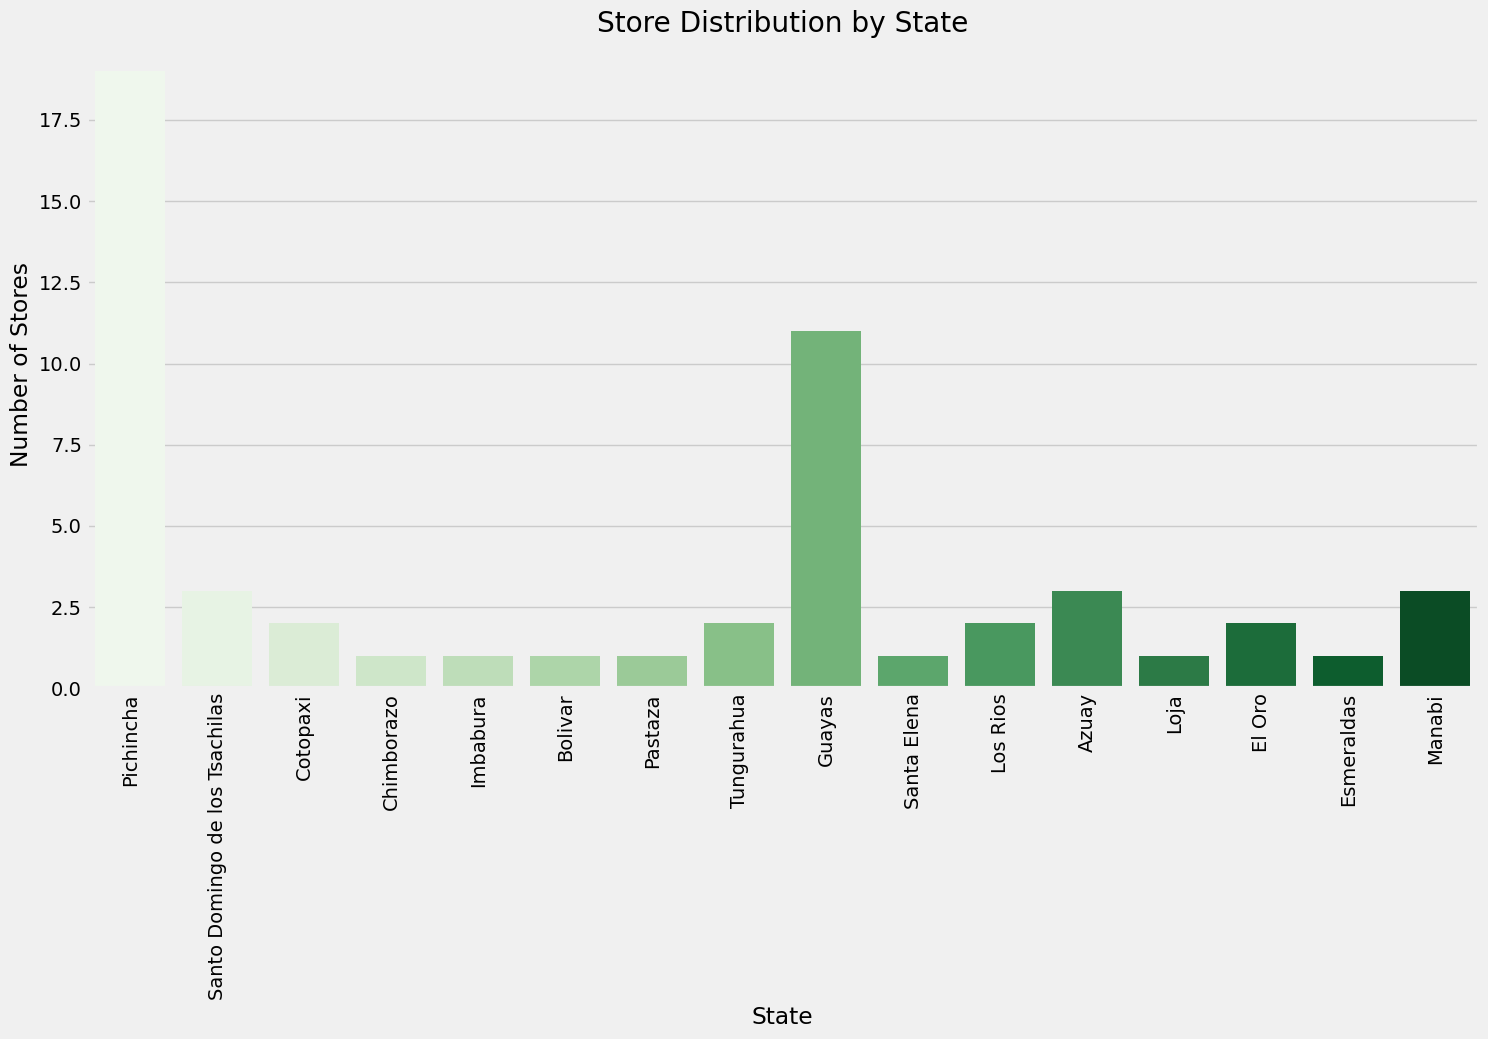

In [38]:

plt.figure(figsize=(16, 8))  # Adjust the width as needed
sns.countplot(x='state', data=stores_df, palette="Greens")
plt.xticks(rotation=90)
plt.title('Store Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Stores')
plt.show()

#### To understand the frequency of different types of holiday event

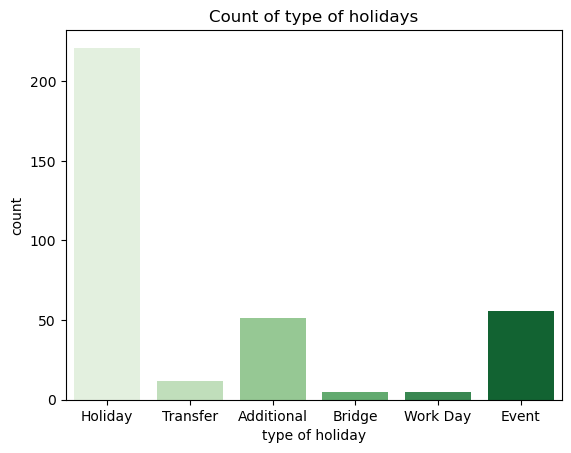

In [8]:
# to understand the frequency of holiday
holiday_df.set_index("date")
sns.countplot(x="type", data=holiday_df, palette='Greens')
plt.xlabel("type of holiday")
plt.title("Count of type of holidays")
plt.show()

<b> Checking the sales over the years

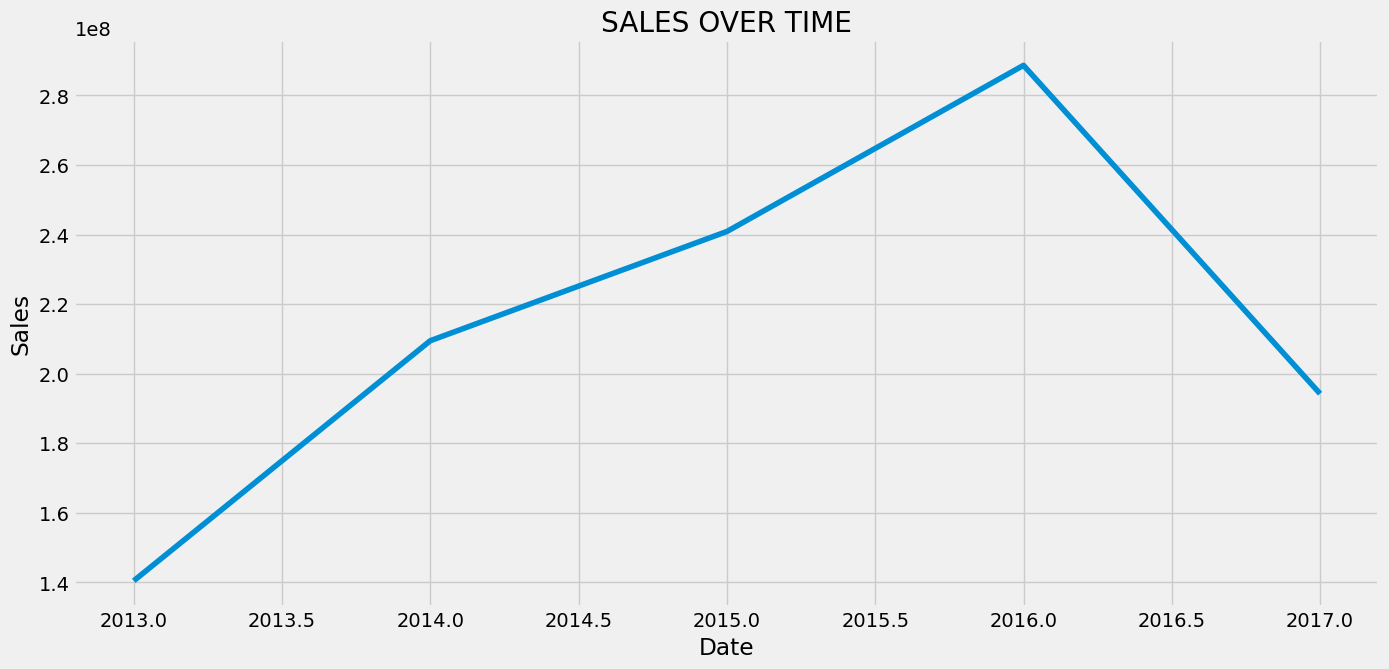

In [57]:
sales_time = train_data.groupby("year").sales.sum().reset_index()
sales_time = sales_time.set_index("year")
sales_time.plot(legend=False, figsize=(15, 7))

plt.title("SALES OVER TIME")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.style.use("fivethirtyeight")
plt.show()

From our visualization there has been increase in the sales of product fro 2013 to first half of 2016 and sfter the sales started droping till 2017, which will still more analysis to understand the sudden drop in the sales

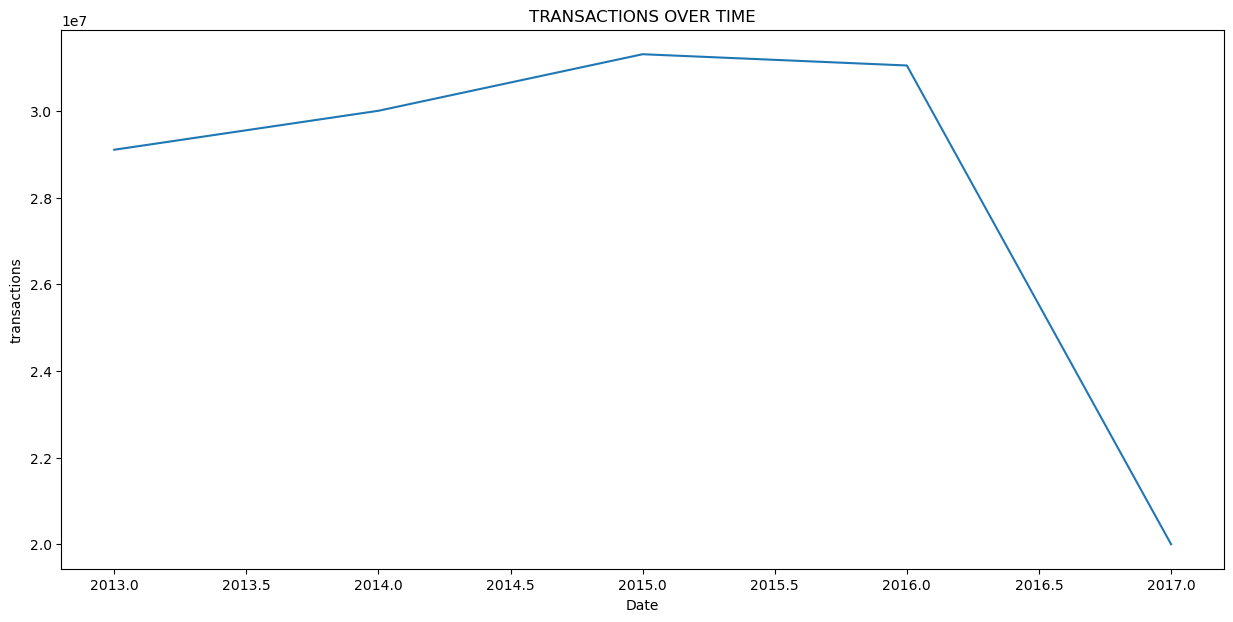

In [9]:
sales_time = transactions.groupby("year").transactions.sum().reset_index()
sales_time = sales_time.set_index("year")
sales_time.plot(legend=False, figsize=(15, 7))

plt.title("TRANSACTIONS OVER TIME")
plt.ylabel("transactions")
plt.xlabel("Date")
plt.style.use("fivethirtyeight")
plt.show()

From our visualization there has been increase in the sales of product fro 2013 to first half of 2016 and sfter the sales started droping till 2017, which will still more analysis to understand the sudden drop in the sales

# Identify regions with more or fewer holidays.

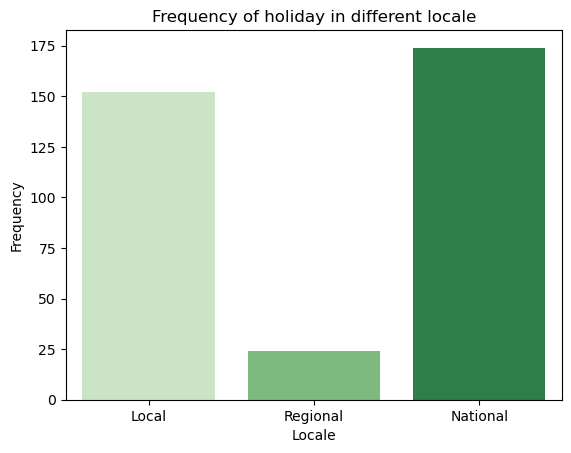

In [12]:
sns.countplot(x='locale', data=holiday_df, palette="Greens")
plt.title('Frequency of holiday in different locale')
plt.xlabel('Locale')
plt.ylabel("Frequency")
plt.show()

<b> Distribution of holiday in different months of the year

adding year and month on table holiday_df


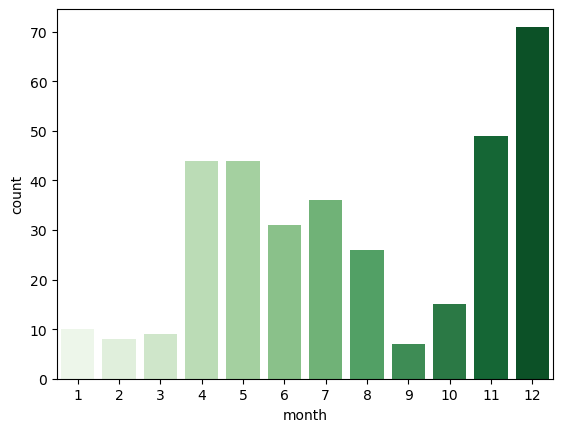

In [9]:
# Distribusion of holidays over different months of the year
add_year_month_(holiday_df,'holiday_df')
sns.countplot(x="month", data=holiday_df, palette= 'Greens')
plt.show()

### sales of differentm products in different cluster

In [14]:
stores_clustter= stores_df.groupby('type')['cluster'].sum().reset_index()
stores_clustter= stores_clustter.sort_values(by='cluster', ascending=False)
stores_clustter

,type,cluster
3,D,123
2,C,122
0,A,111
1,B,62
4,E,40


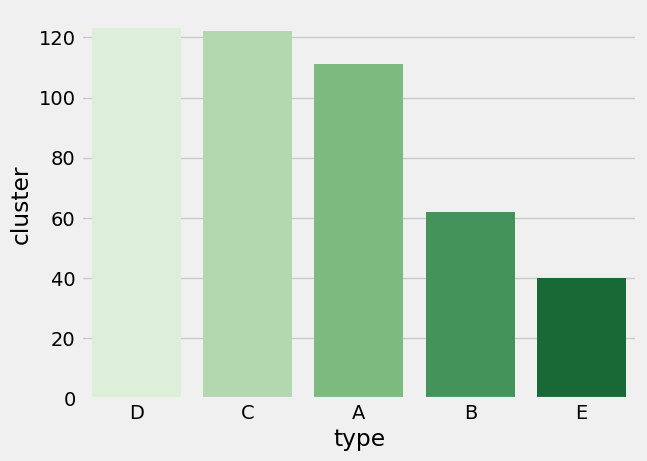

In [15]:
types = stores_df['type']

counts = ["types", "clusters"]
sns.barplot(x="type", y='cluster', data=stores_clustter, palette = 'Greens')


plt.show()

### Visualizing Changes in Crude Oil Prices over Time

<Figure size 1500x1000 with 0 Axes>

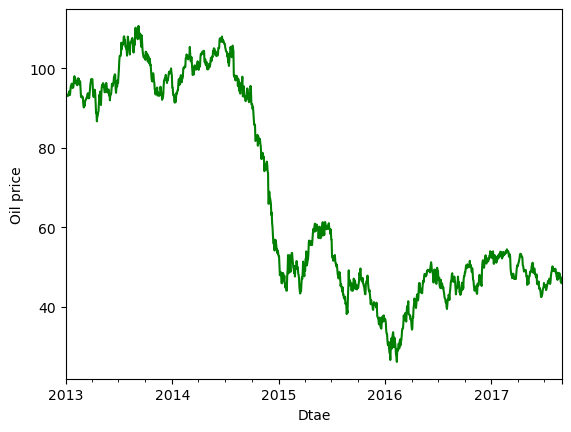

In [10]:
oil_df.set_index("date")
plt.figure(figsize=(15,10))
oil_df.plot(x="date", y="dcoilwtico", color="green", legend=False)
plt.xlabel("Dtae")
plt.ylabel("Oil price")
plt.style.use("fivethirtyeight")
plt.show()

#  Using a pie chart to give an overview of how common it is for holidays to be transferred.

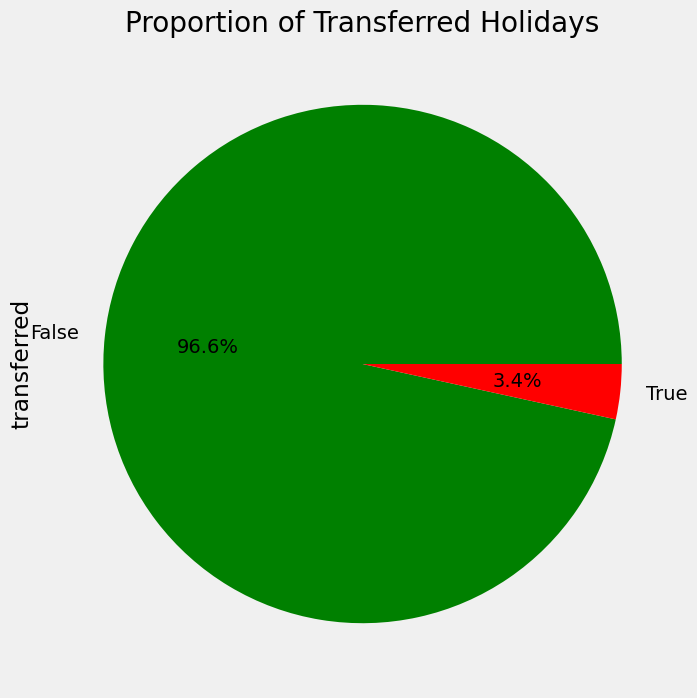

In [11]:
plt.figure(figsize=(8, 8))
holiday_df['transferred'].value_counts().plot.pie(autopct='%1.1f%%', colors='green')
plt.title('Proportion of Transferred Holidays')
plt.show()

<b> Checking for seanality of sales of products over the years

<Figure size 1500x1000 with 0 Axes>

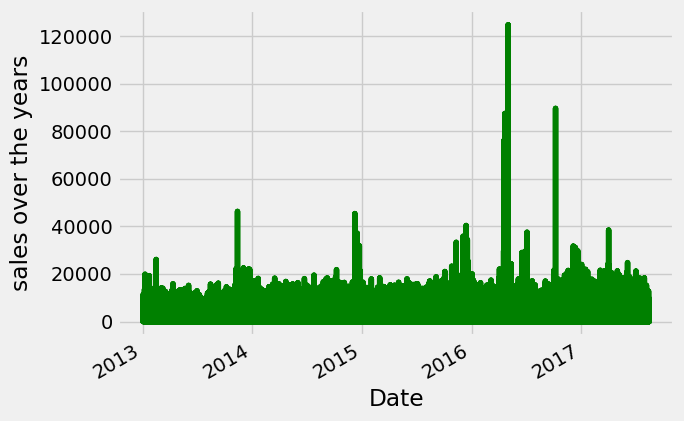

In [35]:
# Checking for seanality of sales of products over the years
# oil_df.set_index("date")
plt.figure(figsize=(15,10))
train_data.plot(x="date", y="sales", color="green", legend=False)
plt.xlabel("Date")
plt.ylabel("sales over the years")
plt.style.use("fivethirtyeight")
plt.show()

From the visualization we can see there is seanality on the data set because towards the end of every year the sales always rise.

<b>  1. Distribusion of sales over the years <b>

In [18]:
sales_frequency    = train_data.groupby('year')['sales'].sum().reset_index()
sales_frequency = sales_frequency.sort_values(by='sales',ascending=False)
sales_frequency

,year,sales
3,2016,2.886545e+08
2,2015,2.408801e+08
1,2014,2.094742e+08
4,2017,1.942171e+08
0,2013,1.404190e+08


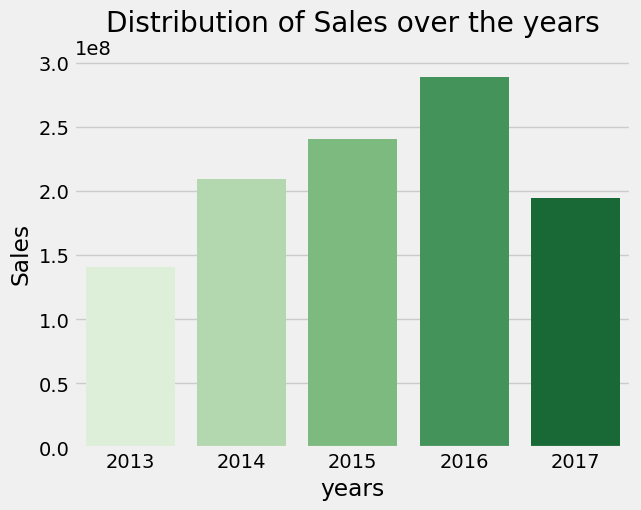

In [25]:
sns.barplot(x= 'year', y='sales', data= sales_frequency, palette="Greens")
plt.title('Distribution of Sales over the years')
plt.ylabel('Sales')
plt.xlabel('years')
plt.show()

# Bivarient

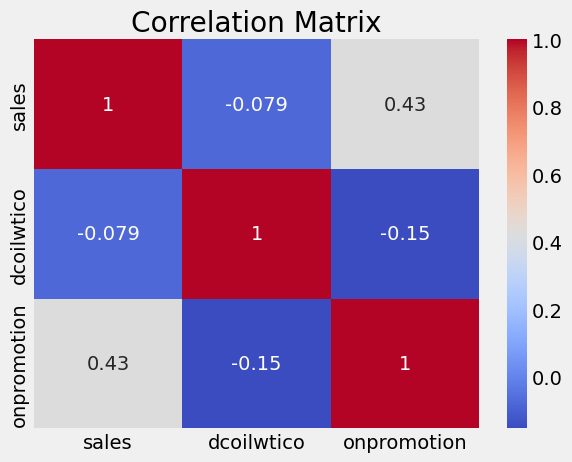

In [24]:
train_oil_data= train_data.merge(oil_df, on ='date', how='left') 
# Select numerical variables for correlation analysis
numerical_vars = ['sales', 'dcoilwtico', 'onpromotion']

# Compute correlation matrix
corr_matrix = train_oil_data[numerical_vars].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Answering Questions and Hypotesis

##### 1. Is the train dataset complete (has all the required dates)?



In [14]:
# Check the completeness of the train dataset
min_date = train_data['date'].min()
max_date = train_data['date'].max()
expected_dates = pd.date_range(start=min_date, end=max_date)

missing_dates = expected_dates[~expected_dates.isin(train_data['date'])]

if len(missing_dates) == 0:
    print("The train dataset is complete. It includes all the required dates.")
else:
    print("The train dataset is incomplete. The following dates are missing:")
    print(missing_dates)

The train dataset is incomplete. The following dates are missing:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


From the above it is obvserverd that the dates in train data set is not complete some of the dates are missing which soposed to be christmas holidays that is 12-25 of every year

In [15]:
#  To complete the missing dates in the data set

# Complete the missing dates in the train dataset
# Create an index of the missing dates as a DatetimeIndex object
missing_dates = pd.Index(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]')

# Create a DataFrame with the missing dates, using the 'date' column
missing_data = pd.DataFrame({'date': missing_dates})

# Concatenate the original train dataset and the missing data DataFrame
# ignore_index=True ensures a new index is assigned to the resulting DataFrame
train_data = pd.concat([train_data, missing_data], ignore_index=True)

# Sort the DataFrame based on the 'date' column in ascending order
train_data.sort_values('date', inplace=True)


In [17]:
# Check the completeness of the train dataset
min_date = train_data['date'].min()
max_date = train_data['date'].max()
expected_dates = pd.date_range(start=min_date, end=max_date)

missing_dates = expected_dates[~expected_dates.isin(train_data['date'])]

if len(missing_dates) == 0:
    print("The train dataset is complete. It includes all the required dates.")
else:
    print("The train dataset is incomplete. The following dates are missing:")
    print(missing_dates)

The train dataset is complete. It includes all the required dates.


#### 2. Which dates have the lowest and highest sales for each year?

In [18]:

# Find the date with the lowest sales for each year
min_sales_dates = train_data.loc[train_data.groupby('year')['sales'].idxmin()][['year', 'date', 'month', 'sales']]

# Find the date with the highest sales for each year
max_sales_dates = train_data.loc[train_data.groupby('year')['sales'].idxmax()][['year', 'date', 'month', 'sales']]

print("Dates with the Lowest Sales for Each Year:")
print(min_sales_dates)

print("\nDates with the Highest Sales for Each Year:")
print(max_sales_dates)

Dates with the Lowest Sales for Each Year:
           year       date  month  sales
0        2013.0 2013-01-01    1.0    0.0
649832   2014.0 2014-01-01    1.0    0.0
1298484  2015.0 2015-01-01    1.0    0.0
1947132  2016.0 2016-01-01    1.0    0.0
2597563  2017.0 2017-01-01    1.0    0.0

Dates with the Highest Sales for Each Year:
           year       date  month       sales
562596   2013.0 2013-11-12   11.0   46271.000
1257246  2014.0 2014-12-08   12.0   45361.000
1916586  2015.0 2015-12-14   12.0   40351.460
2163723  2016.0 2016-05-02    5.0  124717.000
2760297  2017.0 2017-04-02    4.0   38422.625


### 3. Impact of April 16, 2016 earthquake on sales.

In [15]:
oil_sales_data = pd.merge(train_data, oil_df, on='date', how='left')
oil_sales_data = oil_sales_data.set_index('date')


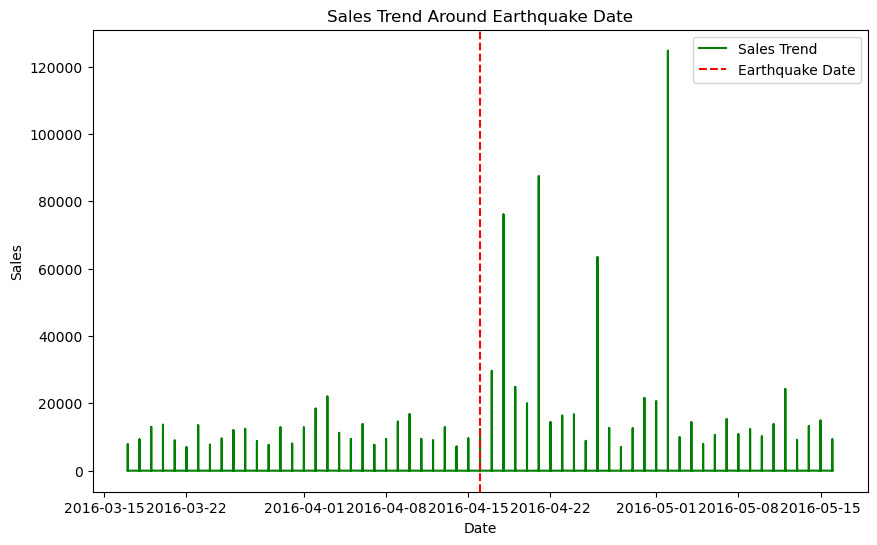

In [31]:

# Assuming 'oil_df' has a datetime index, if not, convert it
oil_sales_data.index = pd.to_datetime(oil_sales_data.index)

earthquake_date = pd.to_datetime('2016-04-16')
start_date = earthquake_date - pd.DateOffset(days=30)
end_date = earthquake_date + pd.DateOffset(days=30)

sales_around_earthquake = oil_sales_data.loc[(oil_sales_data.index >= start_date) & (oil_sales_data.index <= end_date)]

plt.figure(figsize=(10, 6))
plt.plot(sales_around_earthquake.index, sales_around_earthquake['sales'], color='green', label='Sales Trend')
plt.axvline(x=earthquake_date, color='red', linestyle='--', label='Earthquake Date')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend Around Earthquake Date')
plt.legend()
plt.show()


## 4 Are certain groups of stores selling more products? (Cluster, city, state, type)

In [27]:
train_store_data = train_data.merge(stores_df, on='store_nbr', how='left')
top_sales = train_store_data.sort_values(by='sales', ascending=False)
top_10_sales= top_sales.head(20)

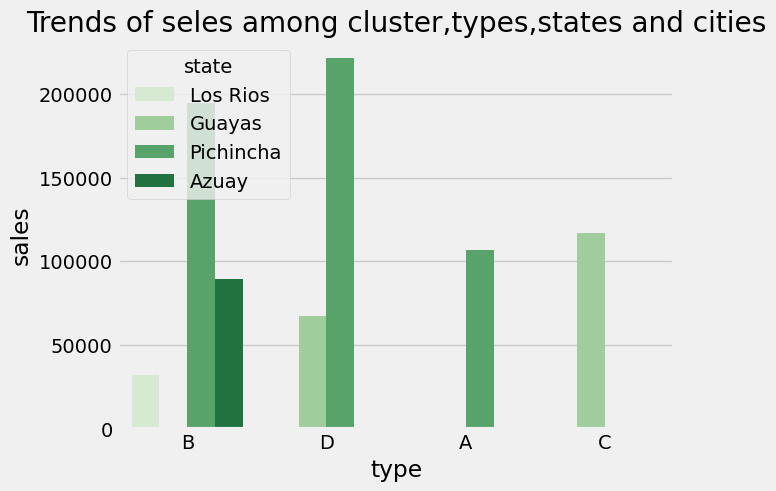

In [30]:
top_10_sales.set_index('date')

stores_sell_products = top_10_sales.groupby(["cluster", "city", "state", "type"])["sales"].sum().reset_index()
stores_sell_products = stores_sell_products.sort_values(by="sales")
sns.barplot(x='type', y='sales', hue='state', data=stores_sell_products, ci=None, palette='Greens')
plt.title('Trends of seles among cluster,types,states and cities')
plt.show()

## 5 Are sales affected by promotions, oil prices and holidays?

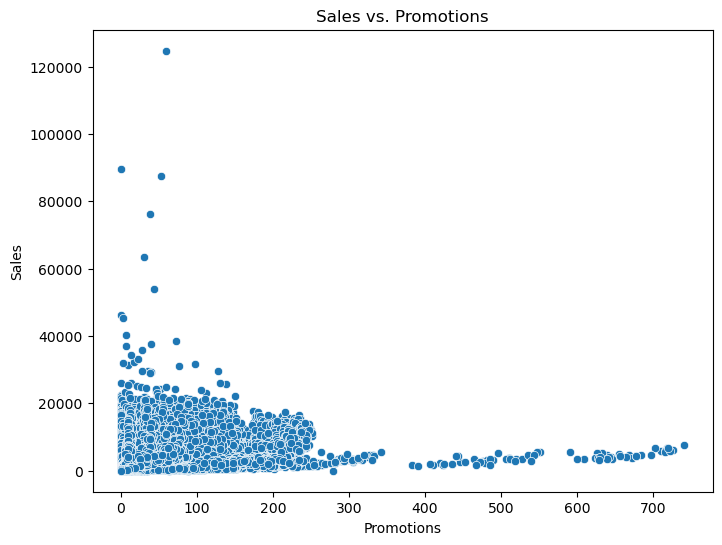

In [26]:
# Correlation analysis
correlation_promotions = train_data[['sales', 'onpromotion']].corr()

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='onpromotion', y='sales', data=train_data)
plt.title('Sales vs. Promotions')
plt.xlabel('Promotions')
plt.ylabel('Sales')
plt.show()

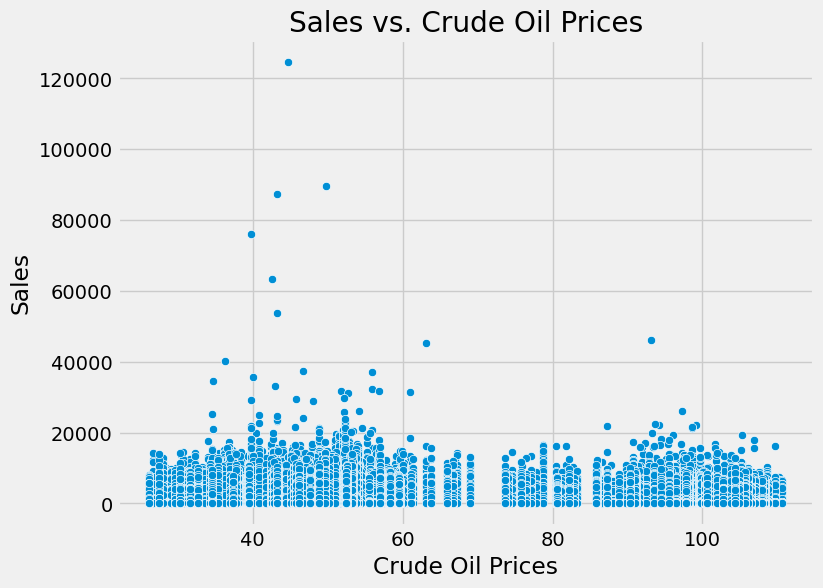

In [32]:


# Merge 'train' and 'oil' on 'date'
# merged_data = pd.merge(train_data, oil_df, on='date', how='left')

# Correlation analysis
correlation_oil_prices =train_oil_data[['sales', 'dcoilwtico']].corr()

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='dcoilwtico', y='sales', data=train_oil_data, palette='Greens')
plt.title('Sales vs. Crude Oil Prices')
plt.xlabel('Crude Oil Prices')
plt.ylabel('Sales')
plt.show()


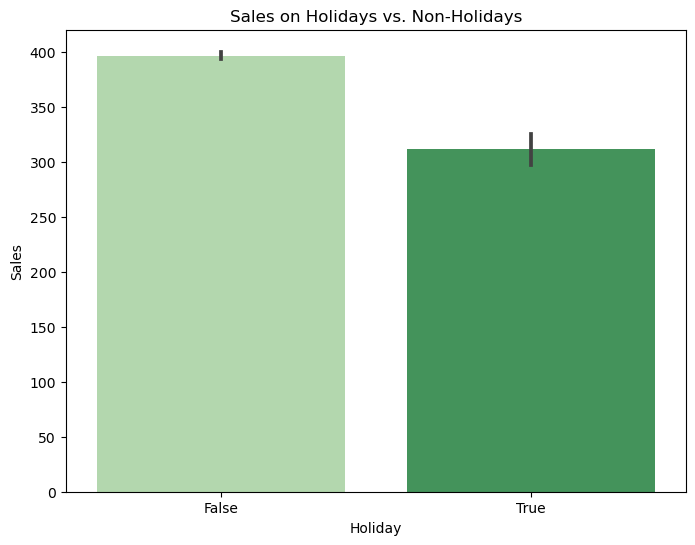

In [16]:



# Merge 'train' and 'holiday' on 'date'
merged_data_holidays = pd.merge(train_data, holiday_df, on='date', how='left')

# Correlation analysis
correlation_holidays = merged_data_holidays[['sales', 'transferred']].corr()

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='transferred', y='sales', data=merged_data_holidays, palette='Greens')
plt.title('Sales on Holidays vs. Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Sales')
plt.show()

<b>Extracting Date Components ( Month, Year and Day of The Week).

In [16]:
# defining a function to etract year and month from the data column
def add_year_month_(df,name):
    print(f'adding year and month on table {name:}')
    df['year']= df["date"].dt.year
    df['month']=df["date"].dt.month
    df['day'] =df['date'].dt.day
    



# Hypotesis Testing

In [17]:

null_hyp = 'the type of holiday  have  significant effect on the increase of sales'
alt_hyp = 'the type of holiday has no significant effect on the increase of sales'
observed_value = pd.crosstab(merged_data_holidays['type'],merged_data_holidays['sales'])
chi2, p_value, dof, expected_value= stats.chi2_contingency(observed_value)
print('chi2:', chi2)
print('p_value:', p_value)
print('dof:', dof)
print('expected_value:',expected_value)
alpha= 0.1
if p_value <= alpha:
    print('The null hypothesis is rejected')
    print(alt_hyp)
else:
    print('The nul hypothesis is accepted')
    print(null_hyp)

chi2: 403717.71291712485
p_value: 1.8592877520968007e-169
dof: 379065
expected_value: [[2.03300000e+04 1.34751773e-01 1.34751773e-01 ... 2.69503546e-01
  1.34751773e-01 1.34751773e-01]
 [1.60500000e+03 1.06382979e-02 1.06382979e-02 ... 2.12765957e-02
  1.06382979e-02 1.06382979e-02]
 [2.99600000e+04 1.98581560e-01 1.98581560e-01 ... 3.97163121e-01
  1.98581560e-01 1.98581560e-01]
 [9.14850000e+04 6.06382979e-01 6.06382979e-01 ... 1.21276596e+00
  6.06382979e-01 6.06382979e-01]
 [4.81500000e+03 3.19148936e-02 3.19148936e-02 ... 6.38297872e-02
  3.19148936e-02 3.19148936e-02]
 [2.67500000e+03 1.77304965e-02 1.77304965e-02 ... 3.54609929e-02
  1.77304965e-02 1.77304965e-02]]
The null hypothesis is rejected
the type of holiday has no significant effect on the increase of sales


From the hypothesis the p_value is 1.8592877520968007e-169 which is greater than the alpha value o.1, this indicate that the type of holiday in the state does not determine increase if there will gbe increase in sales or not, therefore, sales of oil is the same even in the holiday

## Merging the data together to check the stationality of the data before modelling

In [5]:
# Merging the common columns ('store_nbr' and 'date') in the datasets using the inner merge() function
# Merge train_df with stores_df based on 'store_nbr' column
merged_data1 = train_data.merge(stores_df, on='store_nbr', how='inner')

# Merge merged_df1 with transactions_df based on 'date' and 'store_nbr' columns
merged_data2 = merged_data1.merge(transactions, on=['date', 'store_nbr'], how='inner')

# Merge merged_df2 with oil_df based on 'date' column
merged_data = merged_data2.merge(oil_df, on='date', how='inner')

# View the first five rows of the merged dataset
merged_data.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,transactions,dcoilwtico
0,1782,2013-01-02,1,AUTOMOTIVE,2.0,0,Quito,Pichincha,D,13,2111,93.139999
1,1783,2013-01-02,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,2111,93.139999
2,1784,2013-01-02,1,BEAUTY,2.0,0,Quito,Pichincha,D,13,2111,93.139999
3,1785,2013-01-02,1,BEVERAGES,1091.0,0,Quito,Pichincha,D,13,2111,93.139999
4,1786,2013-01-02,1,BOOKS,0.0,0,Quito,Pichincha,D,13,2111,93.139999


In [20]:
merged_data.shape

(1968483, 14)

In [18]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968483 entries, 0 to 1968482
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   city          object        
 7   state         object        
 8   type          object        
 9   cluster       int64         
 10  transactions  int64         
 11  dcoilwtico    float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 195.2+ MB


In [11]:
merged_data.isna().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
type            0
cluster         0
transactions    0
dcoilwtico      0
year            0
month           0
dtype: int64

In [13]:
merged_data.duplicated().sum()

0

In [10]:
# adding year, month and day of the week in the merged data
add_year_month_(merged_data,'merged_data')

adding year and month on table merged_data


In [39]:
merged_data.set_index('date')

,id,store_nbr,family,sales,onpromotion,city,state,type,cluster,transactions,dcoilwtico,year,month
date,,,,,,,,,,,,,
2013-01-02,1782,1,AUTOMOTIVE,2.00000,0,Quito,Pichincha,D,13,2111,93.139999,2013,1
2013-01-02,1783,1,BABY CARE,0.00000,0,Quito,Pichincha,D,13,2111,93.139999,2013,1
2013-01-02,1784,1,BEAUTY,2.00000,0,Quito,Pichincha,D,13,2111,93.139999,2013,1
2013-01-02,1785,1,BEVERAGES,1091.00000,0,Quito,Pichincha,D,13,2111,93.139999,2013,1
2013-01-02,1786,1,BOOKS,0.00000,0,Quito,Pichincha,D,13,2111,93.139999,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,1297885,25,POULTRY,279.16998,0,Salinas,Santa Elena,D,1,2202,52.720001,2015,1
2015-01-01,1297886,25,PREPARED FOODS,121.94100,0,Salinas,Santa Elena,D,1,2202,52.720001,2015,1
2015-01-01,1297887,25,PRODUCE,105.00000,0,Salinas,Santa Elena,D,1,2202,52.720001,2015,1


# Checking for stationarity of the data
<b> using ADF
## Hypothesis
#### Null Hypothesis: the data is stationality
#### Alt Hypothesis:  The data is not stationality

<b> checking for stationarity using kpss

In [41]:
#  selecting 2013 and 2014 bgecause the data is laege, to check for the stationarity of the data using kpss
sample_merged_data= merged_data.loc[merged_data['year'].isin([2013,2014])]


In [10]:
stat, p,lags, critical_values =kpss(merged_data['sales'], 'ct')
print(f'Test statistics:',{stat})
print(f'P_value:',{p})
print(f'critical_values:,{critical_values}')
if p > 0.05:
    print('series is not stationary')
else:
    print('series is stationary')

Test statistics: {2.147616512839002}
P_value: {0.01}
critical_values:,{'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
series is stationary


# Feature Enginering

<b>Dropping Unneccessary Columns in The Merged and Test Datasets as it is not needed for our modelling

From the merged data for visualization we droped the holiday data because the shape of the holiday data is small compare with what we will be needing for the modelling

In [13]:
columns_to_drop = ['state','date']
merged_data_copy = merged_data.drop(columns=columns_to_drop)

merged_data_copy.head()

,id,store_nbr,family,sales,onpromotion,city,type,cluster,transactions,dcoilwtico,year,month
0,1782,1,AUTOMOTIVE,2.0,0,Quito,D,13,2111,93.139999,2013,1
1,1783,1,BABY CARE,0.0,0,Quito,D,13,2111,93.139999,2013,1
2,1784,1,BEAUTY,2.0,0,Quito,D,13,2111,93.139999,2013,1
3,1785,1,BEVERAGES,1091.0,0,Quito,D,13,2111,93.139999,2013,1
4,1786,1,BOOKS,0.0,0,Quito,D,13,2111,93.139999,2013,1


# Feature Processing

In [14]:


# Define the categorical columns to encode
categorical_columns = ["family", "city",'type']

# Perform one-hot encoding
encoder = OneHotEncoder()
one_hot_encoded_data = encoder.fit_transform(merged_data_copy[categorical_columns])

# Create column names for the one-hot encoded data
column_names = encoder.get_feature_names_out(categorical_columns)

# Convert the one-hot encoded data to a DataFrame
merged_df_encoded = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)

# Concatenate the original dataframe with the one-hot encoded data
merged_df_encoded = pd.concat([merged_data_copy, merged_df_encoded], axis=1)

# Drop the original categorical columns
merged_df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Print the head of the encoded DataFrame
merged_df_encoded.head()

,id,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico,year,month,family_AUTOMOTIVE,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,type_A,type_B,type_C,type_D,type_E
0,1782,1,2.0,0,13,2111,93.139999,2013,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1783,1,0.0,0,13,2111,93.139999,2013,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1784,1,2.0,0,13,2111,93.139999,2013,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1785,1,1091.0,0,13,2111,93.139999,2013,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1786,1,0.0,0,13,2111,93.139999,2013,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
dates = merged_data['date']
values = merged_data['sales']
differences = np.diff(values)

In [ ]:
fig = px.line(merged_data, x='date', y='sales', title='sales over time')
fig.update_xaxes(rangeslider_visible=True)
fig.show

# Modelling

<b> seperating the train data and eval data

In [15]:
train_set=merged_df_encoded.loc[merged_df_encoded['year'].isin([2013,2014,2015,2016])]
eval_set=merged_df_encoded.loc[merged_df_encoded['year'] == 2017]

In [35]:
train_set.shape

(1682373, 69)

In [36]:
train_set.columns

Index(['id', 'store_nbr', 'sales', 'onpromotion', 'cluster', 'transactions',
       'dcoilwtico', 'year', 'month', 'family_AUTOMOTIVE', 'family_BABY CARE',
       'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD', 'city_Ambato',
       'city_Babahoyo', 'city_Cayambe', 'city_Cuenca', 'city_Daule',
      

(286110, 71)

In [16]:
# Separate the target variable and features for training and testing
X_train = train_set.drop('sales', axis=1)
y_train = train_set['sales'] 


X_eval = eval_set.drop('sales', axis=1)  
y_eval = eval_set['sales']

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_eval.shape)
print(y_eval.shape)

(1682373, 68)
(1682373,)
(286110, 68)
(286110,)


# Random Forest Regression

In [13]:
rf = RandomForestRegressor(n_estimators=300, max_features='sqrt',max_depth=5,random_state=18).fit(X_train,y_train)

rf_pred= rf.predict(X_eval)
rf_mse= mean_squared_error(y_eval,rf_pred)
rf_rmse= rf_mse**.05
rf_msle = mean_squared_log_error(y_eval, rf_pred)
rf_rmsle = np.sqrt(mean_squared_log_error(y_eval,rf_pred))
print(rf_mse)
print(rf_rmse)
print(rf_msle)
print(rf_rmsle)

624596.6993456223
1.9488570489070132
8.497034543449024
2.9149673314548523


In [20]:
# Assuming X_eval is your feature matrix and y_eval is the target variable
rf_importance = pd.DataFrame({'feature': X_eval.columns, 'y_eval': rf.feature_importances_})
rf_importance.sort_values(by='y_eval', ascending=False, inplace=True)

fig = px.bar(rf_importance, x='feature', y='y_eval')
fig.show()


# Decision Tree Model

In [21]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Create an instance of DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()

In [24]:

dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train,y_train)

tree_pred= dt_regressor.predict(X_eval)
tree_mse= mean_squared_error(y_eval,tree_pred)
tree_rmse=np.sqrt(mean_squared_error(y_eval,tree_pred))
tree_msle = mean_squared_log_error(y_eval, tree_pred)
tree_rmsle = np.sqrt(mean_squared_log_error(y_eval,tree_pred))
print(f'tree mse:{tree_mse}')
print( f'tree rmse:{tree_rmse}')
print(f'tree msle:{tree_msle}')
print(f'tree rmsle:{tree_rmsle}')

tree mse:584655.2451803001
tree rmse:764.6275205486003
tree msle:0.49666339540119864
tree rmsle:0.7047434961751677


# XGBOOST Model

In [29]:
xgb_regresssor = XGBRegressor(max_leaves=0, random_state=0)
xgb_model =xgb_regresssor.fit(X_train,y_train, 
                                eval_metric=['rmsle','rmse'],
                                eval_set=[(X_eval,y_eval)],
                                verbose=100)


[0]	validation_0-rmsle:3.15043	validation_0-rmse:924.21832
[99]	validation_0-rmsle:nan	validation_0-rmse:333.64079


In [19]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_predict

In [20]:
model = AutoReg(X_train, lags=1)
results = model.fit()

plt.plot(X_train, label='Actual')
plt.plot(results.predict(), label='AR Model Predictions', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()


TypeError: can only concatenate list (not "str") to list

#  ARIMA MODEL

In [27]:
# ARIMA Model
# d and q are equal to zero as data is already stationary
p = 1
d = 0 
q = 0  

# Create an instance of the ARIMA model
arima_model = ARIMA(y_train, order=(p, d, q))
                    
# Fit the model to the training data
arima_model_fit = arima_model.fit()

# Make predictions on the evaluation data
arima_predictions = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(X_eval) - 1)

# Calculate evaluation metrics
arima_mse = mean_squared_error(y_eval, arima_predictions)
arima_rmse = np.sqrt(arima_mse)

# Apply the absolute value function to y_eval to remove negative signs
y_eval_abs = abs(y_eval)
arima_predictions_abs = abs(arima_predictions)

# Calculate the Mean Absolute Error (MAE)
arima_mae = mean_absolute_error(y_eval, arima_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
arima_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, arima_predictions_abs))

# Create a DataFrame to store results for ARIMA
results_arima = pd.DataFrame({'Model': ['ARIMA'],
                            'RMSLE': [arima_rmsle],
                            'RMSE': [np.sqrt(arima_mse)],
                            'MSE': [arima_mse],
                            'MAE': [arima_mae]}).round(2)

# Print the results_arima dataframe
results_arima

,Model,RMSLE,RMSE,MSE,MAE
0,ARIMA,3.39,1197.38,1433706.91,548.38


In [ ]:
# Initialize the results dataframe
model_df = pd.DataFrame(columns=['Model', 'RMSLE', 'RMSE', 'MSE', 'MAE'])

In [4]:
# from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
# pacf = plot_pacf(train_data['sales'], lags =10)
# acf = plot_acf(train_data['sales'], lags =10)